**<center><font size="40">pandas</font></center>**

This is a cheat-sheet for pandas api in python. Most of the examples here are found/learned from the pandas documentation, various websites on the internet and DataCamp Python Career Track Courses.

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype

from sqlalchemy.engine import create_engine
import numpy as np
import random
import os
import matplotlib.pyplot as plt

# I/O

## read_csv()

### regex sep
Read data with complex separators.

In [2]:
# read data line by line
pd.read_csv('data/pz22_test1.txt', header=None, sep='\t').head(3)

,0
0,"on x=-20..26,y=-36..17,z=-47..7"
1,"on x=-20..33,y=-21..23,z=-26..28"
2,"on x=-22..28,y=-29..23,z=-38..16"


In [3]:
pd.read_csv('data/pz22_test1.txt', header=None,
            sep=r"\sx=|\.\.|,y=|,z=|,$", engine='python',
            names=['logic', 'x1', 'x2', 'y1', 'y2', 'z1', 'z2']).head(3)

,logic,x1,x2,y1,y2,z1,z2
0,on,-20,26,-36,17,-47,7
1,on,-20,33,-21,23,-26,28
2,on,-22,28,-29,23,-38,16


### parse_dates
Convert data to <code>datetime[ns]</code> with <code>parse_dates=True</code> arument when importing data in <code>read_csv()</code>.

In [4]:
pd.read_csv('data/aapl.csv', index_col='Date', parse_dates=True,
            usecols=['Open', 'High', 'Low', 'Date']).head(2)


,Open,High,Low
Date,,,
2008-10-14,116.26,116.40,103.14
2008-10-13,104.55,110.53,101.02


## Datasets

### Police

* Import **.csv** file into DF

In [5]:
police = pd.read_csv('data/police.csv')

In [6]:
a = police.iloc[::20000,:7]
a.iloc[1,2] = 'Black'
a.iloc[1,3:-1] = np.nan
a.iloc[2,2] = 'Asian'
a.iloc[2,4:] = np.nan
a.iloc[0,1] = np.nan
a.iloc[3,1:2] = np.nan
a.iloc[3,2] = 'Other'
a.iloc[3,3] = 'Seat belt'
a.iloc[3,-1] = np.nan
a.iloc[3,4] = False
a.iloc[0,4] = True
a.iloc[0,-1] = "Warning"
a.iloc[4,1] = np.nan
a.iloc[4,2] = 'Hispanic'
a.iloc[4,4] = True
a.set_index('stop_datetime')

,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome
stop_datetime,,,,,,
2005-01-04 12:55:00,NaN,White,Equipment,True,NaN,Warning
2007-10-20 16:28:00,M,Black,NaN,NaN,NaN,Citation
2010-05-24 13:35:00,F,Asian,Speeding,NaN,NaN,NaN
2012-09-12 10:09:00,NaN,Other,Seat belt,False,NaN,NaN
2015-03-17 08:55:00,NaN,Hispanic,Moving violation,True,NaN,Citation


In [7]:
police.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [8]:
police.stop_outcome.value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [9]:
police_raw = pd.read_csv('data/police_raw.csv')

### Depth values
* Depth values from AoC 2021 puzzles

In [10]:
#import data
df_pz1 = pd.read_csv("data/pz01.txt",
                     header=None,
                     names=['depth'])
df_pz1.head(4)

,depth
0,182
1,188
2,204
3,203


### Random data set
Create a randomly generated dataset from normal distribution.

In [11]:
df_random = pd.DataFrame(np.random.randn(50, 3), columns=list('ABC'))
df_random.head()

,A,B,C
0,1.096504,1.048731,-1.508189
1,0.380053,-0.469446,0.795962
2,-0.020158,-0.601850,-0.312327
3,1.390368,0.942037,-0.189604
4,0.082207,0.798887,1.518290


### Census 2010

In [12]:
df_cen_2010 = pd.read_csv('data/census_2010.csv')
df_cen_2010.head(3)

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36


### Sales 2009

In [13]:
sales = pd.read_csv('data/SalesJan2009.csv')
sales.head(2)

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,51.500,-1.116667
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,39.195,-94.681940


### World Pop 2018

In [14]:
pop2018 = pd.read_csv("data/world_population.csv", skiprows=4)
pop2018.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN


### Aapl

In [15]:
aapl = pd.read_csv('data/aapl.csv', index_col='Date', parse_dates=True)
aapl.head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26


### Auto

In [16]:
auto = pd.read_csv('data/mpg.csv')
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


### Titanic

In [17]:
titanic = pd.read_csv('data/titanic.csv', sep='\t')
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


## to_csv()

In [138]:
df_tocsv = police[['stop_datetime', 'driver_gender', 
                   'violation', 'is_arrested']]
df_tocsv.head(2)

,stop_datetime,driver_gender,violation,is_arrested
0,2005-01-04 12:55:00,M,Equipment,False
1,2005-01-23 23:15:00,M,Speeding,False


In [144]:
# write DF to .csv file
fname = 'tocsv_example.csv'

if not os.path.isfile('output/' + fname):
    df_tocsv.to_csv('output/'+fname, sep='\t')

### to_excel()

In [145]:
# write DF to excel file
fname_excel = 'toexcel_example.xlsx'

if not os.path.isfile('output/' + fname_excel):
    df_tocsv.to_csv('output/'+fname_excel)

## SQL query

### SQL Magic

In [4]:
# initializing sql magic in jupyter notebook
%load_ext sql

In [5]:
# connect to a sqlite engine
%sql sqlite:///data/census.sqlite

'Connected: @data/census.sqlite'

In [8]:
%sql select name from sqlite_master

 * sqlite:///data/census.sqlite
Done.


name
census
state_fact


In [12]:
%%sql df_census <<
select *
from census

 * sqlite:///data/census.sqlite
Done.
Returning data to local variable df_census


Result from SQL query can be converted to regular pandas data frame via <code>DataFrame</code> call.

In [15]:
df_census.DataFrame().head(3)

,state,sex,age,pop2000,pop2008
0,Illinois,M,0,89600,95012
1,Illinois,M,1,88445,91829
2,Illinois,M,2,88729,89547


## read_sql()

In [18]:
# init connection with SQL dialect
engine = create_engine("sqlite:///data/census.sqlite")

# read SQL query into a DF
pd.read_sql('SELECT * FROM census', con=engine).head(3)

,state,sex,age,pop2000,pop2008
0,Illinois,M,0,89600,95012
1,Illinois,M,1,88445,91829
2,Illinois,M,2,88729,89547


# EDA
Exploratory Data Analysis techniques, functions, methodsd, attributes.

## Methods
Mainly used methods:
* <code>count()</code>
* <code>mean()</code>
* <code>median()</code>
* <code>std()</code>
* <code>quantile()</code>
* <code>min(), max()</code>

### head() / tail()
Capture DF first or last X rows.

In [7]:
pd.concat([police.head(2),police.tail(2)], axis='index')

,stop_datetime,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Frisk
0,2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
1,2005-01-23 23:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False
86534,2015-12-31 22:09:00,F,Hispanic,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,False
86535,2015-12-31 22:47:00,M,White,Registration/plates,False,NaN,Citation,False,0-15 Min,False,Zone X4,False


### info()
Concise summary of a DF.

In [8]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86536 entries, 0 to 86535
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_datetime       86536 non-null  object
 1   driver_gender       86536 non-null  object
 2   driver_race         86536 non-null  object
 3   violation           86536 non-null  object
 4   search_conducted    86536 non-null  bool  
 5   search_type         3307 non-null   object
 6   stop_outcome        86536 non-null  object
 7   is_arrested         86536 non-null  bool  
 8   stop_duration       86536 non-null  object
 9   drugs_related_stop  86536 non-null  bool  
 10  district            86536 non-null  object
 11  Frisk               86536 non-null  bool  
dtypes: bool(4), object(8)
memory usage: 5.6+ MB


### describe()
Summary descriptive statistics about each column of a DF

In [9]:
police.iloc[:, :5].describe()

,stop_datetime,driver_gender,driver_race,violation,search_conducted
count,86536,86536,86536,86536,86536
unique,84429,2,5,6,2
top,2015-01-10 09:11:00,M,White,Speeding,False
freq,8,62762,61870,48423,83229


### isna()
Detect missing values.

In [156]:
pol_nans = police.isna().sum()
pol_nans[pol_nans > 0].sort_values(ascending=False)

search_type    83229
dtype: int64

### unique()

In [65]:
police.driver_race.unique()

array(['White', 'Asian', 'Black', 'Hispanic', 'Other'], dtype=object)

### value_counts()
Counts of unique values for a column.

In [11]:
police.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

Fractions

In [12]:
police.driver_race.value_counts(normalize=True)

White       0.714963
Black       0.141964
Hispanic    0.112404
Asian       0.027607
Other       0.003062
Name: driver_race, dtype: float64

### quantile()

In [180]:
auto[['mpg', 'displacement', 'weight']].quantile(0.5)

mpg               23.0
displacement     148.5
weight          2803.5
Name: 0.5, dtype: float64

In [181]:
auto[['mpg', 'displacement', 'weight']].quantile([0, 0.25, 0.5, 0.75])

,mpg,displacement,weight
0.00,9.0,68.00,1613.00
0.25,17.5,104.25,2223.75
0.50,23.0,148.50,2803.50
0.75,29.0,262.00,3608.00


### sample()
Return a random sample of items from an axis of object.

In [58]:
auto['name'].sample(n=3, random_state=0).to_frame()

,name
65,ford galaxie 500
132,chevrolet vega
74,ford gran torino (sw)


## Attributes

### shape

In [162]:
police.shape

(86536, 12)

### dtypes

In [21]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [24]:
auto.convert_dtypes().dtypes

mpg             Float64
cylinders         Int64
displacement    Float64
horsepower       string
weight            Int64
acceleration    Float64
model_year        Int64
origin            Int64
name             string
dtype: object

### is_unique
Whether an **Index** is unique.

In [183]:
auto.index.is_unique

True

# SELECTING

## Slicing

In [111]:
sales_sub = sales.head(3)
sales_sub

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,51.50000,-1.116667
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,39.19500,-94.681940
2,1/2/09 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,46.18806,-123.830000


### Values
* <code>.loc[]</code> is preferred over others since it is faster when accessing multindexed DFs

In [156]:
# different ways to select same data from DF
sales_sub['Name'][1] 
sales_sub.Name[1] 
sales_sub.loc[1, 'Name']
sales_sub.iloc[1, 4]

'Betina'

### Series

In [167]:
print(sales_sub['Name'], '\n')
print(f"Type: {type(sales_sub['Name'])}")

0             carolina
1               Betina
2    Federica e Andrea
Name: Name, dtype: object 

Type: <class 'pandas.core.series.Series'>


### DataFrame

In [163]:
sales_sub[['Name', 'City', 'State']]
sales_sub.loc[:, 'Name': 'State']
sales_sub.loc[:, ['Name', 'City', 'State']] # accepts lists
sales_sub.iloc[:, 4:7]

,Name,City,State
0,carolina,Basildon,England
1,Betina,Parkville,MO
2,Federica e Andrea,Astoria,OR


In [171]:
sales[['Name', 'City', 'State']][0:3]

,Name,City,State
0,carolina,Basildon,England
1,Betina,Parkville,MO
2,Federica e Andrea,Astoria,OR


### Reverse slicing

In [246]:
sales_sub.loc[2:0:-1, 'Name':'State']

,Name,City,State
2,Federica e Andrea,Astoria,OR
1,Betina,Parkville,MO
0,carolina,Basildon,England


### DateTime

In [188]:
sales.loc[:5, 'Transaction_date': 'State']

,Transaction_date,Product,Price,Payment_Type,Name,City,State
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO
2,1/2/09 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR
3,1/3/09 14:44,Product1,1200,Visa,Gouya,Echuca,Victoria
4,1/4/09 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL
5,1/4/09 13:19,Product1,1200,Visa,LAURENCE,Mickleton,NJ


In [244]:
sales_sub2 = sales[['Transaction_date', 'Name', 'City', 'State']][0:5] \
                    .set_index('Transaction_date')

# convert index to datetime dtype
sales_sub2.index = pd.to_datetime(sales_sub2.index)
sales_sub2 = sales_sub2.sort_index()
sales_sub2

,Name,City,State
Transaction_date,,,
2009-01-02 04:53:00,Betina,Parkville,MO
2009-01-02 06:17:00,carolina,Basildon,England
2009-01-02 13:08:00,Federica e Andrea,Astoria,OR
2009-01-03 14:44:00,Gouya,Echuca,Victoria
2009-01-04 12:56:00,Gerd W,Cahaba Heights,AL


In [245]:
sales_sub2.loc['2009-01-02 05': '2009-01-04', :]

,Name,City,State
Transaction_date,,,
2009-01-02 06:17:00,carolina,Basildon,England
2009-01-02 13:08:00,Federica e Andrea,Astoria,OR
2009-01-03 14:44:00,Gouya,Echuca,Victoria
2009-01-04 12:56:00,Gerd W,Cahaba Heights,AL


## Filtering
Filtering data from DFs not by labels and indexes but by **properties**.

In [75]:
world_pop = pop2018[['Country Name', 'Country Code', '2010', '2015']]
world_pop.head(2)

,Country Name,Country Code,2010,2015
0,Aruba,ABW,101669.0,104341.0
1,Afghanistan,AFG,28803167.0,33736494.0


### Boolean mask

In [104]:
# find countries/regions with more than 1b people in 2010
world_pop[world_pop['2010'] >= 1e9].head(2)

,Country Name,Country Code,2010,2015
38,China,CHN,1.337705e+09,1.371220e+09
59,East Asia & Pacific (excluding high income),EAP,1.966232e+09,2.038411e+09


In [103]:
world_pop.loc[world_pop['2010'] >= 1e9].head(2)

,Country Name,Country Code,2010,2015
38,China,CHN,1.337705e+09,1.371220e+09
59,East Asia & Pacific (excluding high income),EAP,1.966232e+09,2.038411e+09


### Callable mask

In [105]:
world_pop.loc[lambda world_pop: world_pop['2010'] >= 1e9].head(2)

,Country Name,Country Code,2010,2015
38,China,CHN,1.337705e+09,1.371220e+09
59,East Asia & Pacific (excluding high income),EAP,1.966232e+09,2.038411e+09


### isin()

In [76]:
world_pop[world_pop['Country Code'].isin(['EST', 'CYP'])]

,Country Name,Country Code,2010,2015
51,Cyprus,CYP,1112607.0,1160985.0
69,Estonia,EST,1331475.0,1315407.0


### Combining Masks

In [255]:
# find regions where population is between 1m and 1.5m people in 2010
world_pop[(world_pop['2010'] > 1e6) & (world_pop['2010'] < 1.5e6)].head(3)

,Country Name,Country Code,2010,2015
20,Bahrain,BHR,1240862.0,1371855.0
51,Cyprus,CYP,1112607.0,1160985.0
69,Estonia,EST,1331475.0,1315407.0


In [257]:
# find regions where population was less than 1m in 2010 or 2015
world_pop[(world_pop['2010'] < 1e6) | (world_pop['2015'] < 1e6)].head(4)

,Country Name,Country Code,2010,2015
0,Aruba,ABW,101669.0,104341.0
4,Andorra,AND,84449.0,78014.0
9,American Samoa,ASM,55637.0,55537.0
10,Antigua and Barbuda,ATG,94661.0,99923.0


### Not mask

In [110]:
world_pop[~(world_pop['2015'] < 5e9)].dropna().sort_values('2015', ascending=False)

,Country Name,Country Code,2010,2015
257,World,WLD,6.932881e+09,7.357370e+09
101,IDA & IBRD total,IBT,5.803571e+09,6.194064e+09
138,Low & middle income,LMY,5.783367e+09,6.174437e+09
154,Middle income,MIC,5.223360e+09,5.532579e+09


### NaN mask

In [303]:
world_pop[world_pop.isna().any(axis=1)]

,Country Name,Country Code,2010,2015
67,Eritrea,ERI,4390840.0,NaN
108,Not classified,INX,NaN,NaN


### Non-Zero mask

In [304]:
world_pop_0 = world_pop.fillna(0) # fill NaN-s with 0-s
world_pop_0.loc[(world_pop_0 == 0).any(axis=1)]

,Country Name,Country Code,2010,2015
67,Eritrea,ERI,4390840.0,0.0
108,Not classified,INX,0.0,0.0


In [308]:
# Columns with all NONZERO values. Other columns are rejected.
world_pop_0.loc[:, world_pop_0.all()].head(2)

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG


### query()

In [114]:
que = pd.DataFrame(np.random.randint(4, size=(4, 3)), columns=list('abc'))
que

,a,b,c
0,3,2,2
1,0,2,1
2,0,0,2
3,3,2,1


In [116]:
que.query('a < b & b > c')

,a,b,c
1,0,2,1


In [118]:
que.query('a < b > c')

,a,b,c
1,0,2,1


In [117]:
# python syntax vs pandas
que[(que['a'] < que['b']) & (que['b'] > que['c'])]

,a,b,c
1,0,2,1


# PREP

## NaN-s
<u><font color="red">WARNING!:</font></u> <code>NaN</code>-s dont compare equal, but <code>None</code>-s do:

In [157]:
print("NaN == NaN:",np.nan == np.nan)
print("None == None:", None == None)

NaN == NaN: False
None == None: True


In [158]:
type(np.nan)

float

NaN-s or missing values can be:
* **Removed** - If small fraction excist
* **Imputed** - Replaced with an estimate
* **Factored** - Use it as a value itself

### isna()
Find missing values.

In [13]:
police_raw[police_raw.driver_gender.isna()].iloc[::2000,:]

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
15,RI,2005-09-03,16:02,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone K3
35464,RI,2009-06-14,17:11,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X4
65902,RI,2012-12-11,22:24,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone K2


### notna()

In [63]:
police_raw.state.notna().count()

91741

### drop()
Remove entire columns or rows from a DF.

In [14]:
police_raw.head(1)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [15]:
police_raw[['county_name']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   county_name  0 non-null      float64
dtypes: float64(1)
memory usage: 716.9 KB


In [16]:
#remove 'county_name' column since all values are NaN-s
police_raw.drop('county_name', axis='columns').head(2)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


### dropna()
Remove missing values.

In [17]:
#sample data
p_raw_sub = police_raw[['stop_date', 'driver_gender', 'stop_duration']]
p_raw_sub.head(2)

,stop_date,driver_gender,stop_duration
0,2005-01-04,M,0-15 Min
1,2005-01-23,M,0-15 Min


In [18]:
p_raw_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stop_date      91741 non-null  object
 1   driver_gender  86536 non-null  object
 2   stop_duration  86539 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [19]:
#dropping rows that contain missing values
p_raw_sub.dropna(axis='index',how='any').shape

(86536, 3)

### fillna()
Missing values can be filled with user provided value or with some summary statistics (mean/mdian...)

In [23]:
# create df with NaN values
df_random_nan = df_random.mask(df_random < 0, np.nan)
df_random_nan.head(3)

,A,B,C
0,1.153267,NaN,0.504181
1,0.250464,NaN,0.713280
2,NaN,0.262787,0.505978


In [27]:
# For multiple columns the same thing can be applied at once
df_random_nan[['B', 'C']] = df_random_nan[['B', 'C']].fillna(0)

# using summary statistics
mean_A = df_random_nan['A'].mean()
df_random_nan['A'] = df_random_nan['A'].fillna(mean_A)

print(f"Col A mean value: {mean_A:.6f}")
df_random_nan.head(3)

Col A mean value: 0.884552


,A,B,C
0,1.153267,0.000000,0.504181
1,0.250464,0.000000,0.713280
2,0.884552,0.262787,0.505978


### interpolate()
Fill NaN values using an interpolation method.

In [59]:
s_i = pd.Series([0, 1, np.nan, 3])
s_i

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64

In [60]:
# linear interpolation
s_i.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

## Duplicates

### drop_duplicates()

In [19]:
# grab subset of police data
police_dd = police[['driver_gender', 'driver_race', 'is_arrested']]
print(police_dd.info(),'\n')
police_dd.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86536 entries, 0 to 86535
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   driver_gender  86536 non-null  object  
 1   driver_race    86536 non-null  category
 2   is_arrested    86536 non-null  bool    
dtypes: bool(1), category(1), object(1)
memory usage: 845.3+ KB
None 



,driver_gender,driver_race,is_arrested
0,M,category,False
1,M,category,False
2,M,category,False


In [20]:
police_dd.drop_duplicates()

,driver_gender,driver_race,is_arrested
0,M,category,False
3,M,category,True
4,F,category,False
119,F,category,True


## Data Types

### dtypes

In [22]:
#determine data dtype(s)
police.dtypes

stop_datetime         object
driver_gender         object
driver_race           object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
Frisk                   bool
dtype: object

### astype()
Change the data type of a column / row.

In [23]:
police.driver_race.astype('category').dtype

CategoricalDtype(categories=['Asian', 'Black', 'Hispanic', 'Other', 'White'], ordered=False)

In [6]:
police['driver_race'] = police['driver_race'].astype('category')
police['driver_race'].dtype

CategoricalDtype(categories=[category], ordered=False)

### Categorical
When we use <code>astype('category')</code> default behaviours are:
* Categories are inferred from the data.
* Categories are unordered.

However, if control is needed over the data use <code>CategoricalDtype</code> construct instead. It is imported:

In [187]:
from pandas.api.types import CategoricalDtype

# example usage
s_cat = pd.Series(["a", "b", "c", "a"])
cat_type = CategoricalDtype(categories=['b', 'c', 'd'], ordered=True)
s_cat = s_cat.astype(cat_type)
s_cat

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): ['b' < 'c' < 'd']

In [189]:
s_cat.cat.categories

Index(['b', 'c', 'd'], dtype='object')

Another way to declare order and without <code>CategoricalDType</code>

In [192]:
s_cat2 = pd.Series([1,2,3,1], dtype='category')
s_cat2 = s_cat2.cat.reorder_categories([2,3,1], ordered=True)
s_cat2

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

### Bad dtypes
There can be a dash in a numeric column, transferring whole column into a string (object) data type.

In [9]:
df_random.head(3)

,A,B,C
0,1.153267,-0.964927,0.504181
1,0.250464,2.045061,0.713280
2,-0.288834,0.262787,0.505978


In [11]:
# change value to '-'
df_random.loc[1,'B'] = "1.1"
df_random.head(3)

,A,B,C
0,1.153267,-0.964927,0.504181
1,0.250464,-,0.713280
2,-0.288834,0.262787,0.505978


In [12]:
df_random.dtypes

A    float64
B     object
C    float64
dtype: object

To convert the values into numeric and invalid values to <code>NaN</code>, we can use:

In [15]:
df_random['B'] = pd.to_numeric(df_random['B'], errors='coerce')
print(df_random.dtypes,'\n')
df_random.head(3)

A    float64
B    float64
C    float64
dtype: object 



,A,B,C
0,1.153267,-0.964927,0.504181
1,0.250464,NaN,0.713280
2,-0.288834,0.262787,0.505978


## Indexing
Key building blocks:
* **Indexes**: Sequence of labels
* **Series**: 1D array with Index
* **DataFrames**: 2D array with Series as columns

### Series()

In [147]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
test_series = pd.Series([random.randint(0, 10) for i in range(0, 5)],
                        index=days)
test_series

Mon     8
Tue     0
Wed     0
Thu     5
Fri    10
dtype: int64

In [148]:
test_series.index.name = 'weekday'
test_series

weekday
Mon     8
Tue     0
Wed     0
Thu     5
Fri    10
dtype: int64

### set_index()

In [25]:
police.head(2)

,stop_datetime,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Frisk
0,2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
1,2005-01-23 23:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False


In [26]:
police_index = police.head(2).set_index('stop_datetime')
police_index

,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Frisk
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-01-23 23:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False


### reset_index()

In [27]:
police_index.reset_index()

,stop_datetime,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Frisk
0,2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
1,2005-01-23 23:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False


### MultiIndexing
Specifying more than one index.

In [25]:
# generate a example DF
sample = police.loc[:5,'stop_datetime':'search_conducted']
sample

,stop_datetime,driver_gender,driver_race,violation,search_conducted
0,2005-01-04 12:55:00,M,White,Equipment,False
1,2005-01-23 23:15:00,M,White,Speeding,False
2,2005-02-17 04:15:00,M,White,Speeding,False
3,2005-02-20 17:15:00,M,White,Other,False
4,2005-02-24 01:20:00,F,White,Speeding,False
5,2005-03-14 10:00:00,F,White,Speeding,False


In [26]:
# setting multiindex
sample.set_index(['stop_datetime','violation'], inplace=True)
sample

,,driver_gender,driver_race,search_conducted
stop_datetime,violation,,,
2005-01-04 12:55:00,Equipment,M,White,False
2005-01-23 23:15:00,Speeding,M,White,False
2005-02-17 04:15:00,Speeding,M,White,False
2005-02-20 17:15:00,Other,M,White,False
2005-02-24 01:20:00,Speeding,F,White,False
2005-03-14 10:00:00,Speeding,F,White,False


#### swap levels

In [32]:
sample.swaplevel(0,1)

driver_gender driver_race  search_conducted
violation stop_datetime                                                  
Equipment 2005-01-04 12:55:00             M       White             False
Speeding  2005-01-23 23:15:00             M       White             False
          2005-02-17 04:15:00             M       White             False
Other     2005-02-20 17:15:00             M       White             False
Speeding  2005-02-24 01:20:00             F       White             False
          2005-03-14 10:00:00             F       White             False

#### sort_index()

In [33]:
sample.sort_index(level='violation')

,,driver_gender,driver_race,search_conducted
stop_datetime,violation,,,
2005-01-04 12:55:00,Equipment,M,White,False
2005-02-20 17:15:00,Other,M,White,False
2005-01-23 23:15:00,Speeding,M,White,False
2005-02-17 04:15:00,Speeding,M,White,False
2005-02-24 01:20:00,Speeding,F,White,False
2005-03-14 10:00:00,Speeding,F,White,False


#### select level

In [27]:
sample.head(2)

,,driver_gender,driver_race,search_conducted
stop_datetime,violation,,,
2005-01-04 12:55:00,Equipment,M,White,False
2005-01-23 23:15:00,Speeding,M,White,False


In [28]:
# select only the inner level index
sample.index.levels[1]

Index(['Equipment', 'Other', 'Speeding'], dtype='object', name='violation')

### Datetime

#### pd.to_datetime()

In [32]:
#sample data
sample = police.loc[:3, 'stop_datetime':'search_conducted']

#set stop_datetime to index and change dtype to datetime
sample.set_index('stop_datetime', inplace=True)
sample.index = pd.to_datetime(sample.index)
sample.head(2)

,driver_gender,driver_race,violation,search_conducted
stop_datetime,,,,
2005-01-04 12:55:00,M,White,Equipment,False
2005-01-23 23:15:00,M,White,Speeding,False


#### pd.PeriodIndex

In [33]:
p_sample = police.loc[:3, 'stop_datetime':'search_conducted'] # sample data
p_sample.set_index('stop_datetime', inplace=True) # set index col
p_sample.index = pd.PeriodIndex(p_sample.index, freq='D') # convert 'O' to period
p_sample.index.dtype

period[D]

#### datetime to period

In [34]:
print(f"Index dtype: {sample.index.dtype}")
sample.index.to_period(freq='H')

Index dtype: datetime64[ns]


PeriodIndex(['2005-01-04 12:00', '2005-01-23 23:00', '2005-02-17 04:00',
             '2005-02-20 17:00'],
            dtype='period[H]', name='stop_datetime')

#### period to datetime

In [35]:
print(f"Index dtype: {p_sample.index.dtype}")
p_sample.index.astype('datetime64[ns]')

Index dtype: period[D]


DatetimeIndex(['2005-01-04', '2005-01-23', '2005-02-17', '2005-02-20'], dtype='datetime64[ns]', name='stop_datetime', freq=None)

#### Multindex astype 

In [45]:
# set multiindex
sample_mult = sample.reset_index().set_index(['violation', 'stop_datetime'])

# print multindex data types
print(sample_mult.index.dtypes)
sample_mult

violation                object
stop_datetime    datetime64[ns]
dtype: object


driver_gender driver_race  search_conducted
violation stop_datetime                                                  
Equipment 2005-01-04 12:55:00             M       White             False
Speeding  2005-01-23 23:15:00             M       White             False
          2005-02-17 04:15:00             M       White             False
Other     2005-02-20 17:15:00             M       White             False

In [46]:
# change stop_datetime dtype
idx = sample_mult.index
sample_mult.index = (
    sample_mult
    .index
    .set_levels(idx.levels[-1].to_period(freq='D'), level=-1)
)
sample_mult.index.dtypes

violation           object
stop_datetime    period[D]
dtype: object

#### pd.date_range()

In [34]:
randm_dr = df_random.head(4)
randm_dr

,A,B,C
0,-1.177842,-0.615853,0.288280
1,-1.392192,-1.197012,-0.122535
2,0.281162,-0.305431,0.079983
3,-0.708084,-0.635634,0.086058


In [35]:
randm_dr.index = pd.date_range(start='2022-02-13', end='2022-02-16', freq='D')
randm_dr

,A,B,C
2022-02-13,-1.177842,-0.615853,0.288280
2022-02-14,-1.392192,-1.197012,-0.122535
2022-02-15,0.281162,-0.305431,0.079983
2022-02-16,-0.708084,-0.635634,0.086058


#### between_time()

In [46]:
sample.head(2)

,driver_gender,driver_race,violation,search_conducted
stop_datetime,,,,
2005-01-04 12:55:00,M,White,Equipment,False
2005-01-23 23:15:00,M,White,Speeding,False


In [53]:
sample.between_time('03:00', '04:10').head(2)

,driver_gender,driver_race,violation,search_conducted
stop_datetime,,,,
2005-10-02 03:00:00,M,White,Speeding,False
2005-10-05 03:00:00,F,White,Equipment,True


In [55]:
# to exclude an interval set start time later thand end time
sample.between_time('04:10', '03:00').head(2)

,driver_gender,driver_race,violation,search_conducted
stop_datetime,,,,
2005-01-04 12:55:00,M,White,Equipment,False
2005-01-23 23:15:00,M,White,Speeding,False


#### by date

In [41]:
#selecting by date
sample.loc['2005-2', ].head(3)

,driver_gender,driver_race,violation,search_conducted
stop_datetime,,,,
2005-02-17 04:15:00,M,White,Speeding,False
2005-02-20 17:15:00,M,White,Other,False
2005-02-24 01:20:00,F,White,Speeding,False


#### by time

In [42]:
#selecting by time
sample.between_time('12:00:00','22:00:00').head(3)

,driver_gender,driver_race,violation,search_conducted
stop_datetime,,,,
2005-01-04 12:55:00,M,White,Equipment,False
2005-02-20 17:15:00,M,White,Other,False
2005-03-29 21:55:00,M,White,Speeding,False


#### Down-sampling

Resampling - e.g. resampling data from daily to weekly (downsampling).

##### Monhtly

In [43]:
# calculate monthly searches conducted
sample_m = sample.loc['2015-08':,:]
sample_m.resample('M').search_conducted.sum() # 'M' stands for month

stop_datetime
2015-08-31    25
2015-09-30    18
2015-10-31    20
2015-11-30    11
2015-12-31    13
Freq: M, Name: search_conducted, dtype: int64

##### Weekly & Bi-weekly

In [40]:
#weekly max numnber of arrests done
sample.resample('W').search_conducted.sum().max()

18.0

In [41]:
#same query for 2 week interval
sample.resample('2W').search_conducted.sum().max()

26.0

#### Up-sampling

In [72]:
aapl.sort_index(ascending=True).head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2007-07-13,135.03,137.85,134.52,137.73,32414500,137.73
2007-07-16,138.39,139.98,137.50,138.10,33432600,138.10
2007-07-17,138.30,139.60,137.50,138.91,25355700,138.91


In [73]:
aapl.asfreq('12h').head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2007-07-13 00:00:00,135.03,137.85,134.52,137.73,32414500.0,137.73
2007-07-13 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


## Mapping

### creating columns

In [325]:
world_new = world_pop.head(2)
world_new

,Country Name,Country Code,2010,2015
0,Aruba,ABW,101669.0,104341.0
1,Afghanistan,AFG,28803167.0,33736494.0


In [326]:
world_new['total'] = world_new['2010'] + world_new['2015']
world_new

/tmp/ipykernel_65975/2780832901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_new['total'] = world_new['2010'] + world_new['2015']


,Country Name,Country Code,2010,2015,total
0,Aruba,ABW,101669.0,104341.0,206010.0
1,Afghanistan,AFG,28803167.0,33736494.0,62539661.0


### Encoding

#### replace()

In [263]:
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [254]:
# prepare data for the example
auto_dum = auto[['mpg', 'horsepower', 'weight', 'origin']].copy()
auto_dum['origin'] = auto_dum.origin.replace({1:'Asia', 2:'Europe', 3:'US'})
auto_dum.head(2)

,mpg,horsepower,weight,origin
0,18.0,130,3504,Asia
1,15.0,165,3693,Asia


##### String/regular expression replacement

In [175]:
df_reg = df_random.head().copy()
df_reg[df_reg < 0] = '-'
df_reg.head(2)

,A,B,C
0,-,-,0.28828
1,-,-,-


In [174]:
df_reg.replace(r"\s*-\s*", np.nan, regex=True).head(2)

,A,B,C
0,NaN,NaN,0.28828
1,NaN,NaN,NaN


In [177]:
df_reg.replace({'B':r"\s*-\s*"}, {'B':np.nan}, regex=True).head(2)

,A,B,C
0,-,NaN,0.28828
1,-,NaN,-


#### pd.get_dummies()
Convert categorical variable into dummy/indicator variables.

In [258]:
pd.get_dummies(auto_dum, columns=['origin']).head(2)

,mpg,horsepower,weight,origin_Asia,origin_Europe,origin_US
0,18.0,130,3504,1,0,0
1,15.0,165,3693,1,0,0


The origin column is split into three independent columns, each cointaing true values ony for their category. Since we know that 3rd car is not European nor US we can totally delete the **'origin_Asia'** column.

In [259]:
pd.get_dummies(auto_dum, columns=['origin'], drop_first=True).head(2)

,mpg,horsepower,weight,origin_Europe,origin_US
0,18.0,130,3504,0,0
1,15.0,165,3693,0,0


#### factorize()
Encode the object as an enumerated type or categorical variable.

In [287]:
tit_fact = titanic[['Sex', 'Age', 'Embarked']]
tit_fact.head(2)

,Sex,Age,Embarked
0,male,22.0,S
1,female,38.0,C


In [289]:
tit_fact.loc[:,'Embarked'] = tit_fact['Embarked'].factorize()[0]
tit_fact.head(2)

/tmp/ipykernel_116186/1035600712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit_fact.loc[:,'Embarked'] = tit_fact['Embarked'].factorize()[0]


,Sex,Age,Embarked
0,male,22.0,0
1,female,38.0,1


### apply()

In [20]:
police_raw.violation_raw.value_counts(normalize=True, dropna=False)

Speeding                            0.527834
Other Traffic Violation             0.176846
Equipment/Inspection Violation      0.119053
NaN                                 0.056703
Registration Violation              0.040364
Seatbelt Violation                  0.031131
Special Detail/Directed Patrol      0.026891
Call for Service                    0.015173
Motorist Assist/Courtesy            0.002235
Violation of City/Town Ordinance    0.001973
APB                                 0.000992
Suspicious Person                   0.000610
Warrant                             0.000196
Name: violation_raw, dtype: float64

In [21]:
#dict for replacing values
replace_dict = {'Speeding':'Speeding',
                'Other Traffic Violation':'Moving',
                'Equipment/Inspection Violation':'Equipment',
                'Registration Violation':'Registration',
                'Seatbelt Violation':'Seat belt'}

police_raw.violation_raw.apply(lambda x: x if x in replace_dict else 'Other').value_counts(normalize=True)

Speeding                          0.527834
Other Traffic Violation           0.176846
Equipment/Inspection Violation    0.119053
Other                             0.104773
Registration Violation            0.040364
Seatbelt Violation                0.031131
Name: violation_raw, dtype: float64

### diff()
* Subtract **<code>i</code>** from **<code>i+1</code>**

In [24]:
df_pz1.head(3)

,depth
0,182
1,188
2,204


In [25]:
#create a copy df
df_diff = df_pz1.copy()

#find element-wize difference (subtract)
df_diff['dif'] = df_diff.depth.diff()
df_diff.head(3)

,depth,dif
0,182,NaN
1,188,6.0
2,204,16.0


### rolling()
* summing <code>n</code> elements iteration

In [27]:
#creating copy df
df_rolling = df_pz1.copy()

#3-measurement sliding window
df_rolling['3sum'] = df_rolling.depth.rolling(3).sum()
df_rolling.head()

,depth,3sum
0,182,NaN
1,188,NaN
2,204,574.0
3,203,595.0
4,205,612.0


### shift()
* shift values in df 

In [28]:
df_rolling['3sum'] = df_rolling['3sum'].shift(-2)
df_rolling.head()

,depth,3sum
0,182,574.0
1,188,595.0
2,204,612.0
3,203,614.0
4,205,619.0


### floor_divide()
Convert units of **x** and round **down**. Vectorized!

In [317]:
world_pop.head(2)

,Country Name,Country Code,2010,2015
0,Aruba,ABW,101669.0,104341.0
1,Afghanistan,AFG,28803167.0,33736494.0


In [318]:
world_pop.head(2)['2010'].floordiv(1000)

0      101.0
1    28803.0
Name: 2010, dtype: float64

## Formating

### Sorting

#### sort_values()

In [299]:
police_sort = police[['driver_race', 'stop_outcome']]
police_sort.head(2)

,driver_race,stop_outcome
0,White,Citation
1,White,Citation


In [300]:
police_sort.groupby('stop_outcome').count()

,driver_race
stop_outcome,
Arrest Driver,2735
Arrest Passenger,343
Citation,77091
N/D,607
No Action,624
Warning,5136


In [302]:
police_sort.groupby('stop_outcome').count().sort_values('driver_race', ascending=False)

,driver_race
stop_outcome,
Citation,77091
Warning,5136
Arrest Driver,2735
No Action,624
N/D,607
Arrest Passenger,343


### Datetime

In [30]:
date_sample = police.iloc[:4,:2].head(4)
date_sample

,stop_datetime,driver_gender
0,2005-01-04 12:55:00,M
1,2005-01-23 23:15:00,M
2,2005-02-17 04:15:00,M
3,2005-02-20 17:15:00,M


In [31]:
#convert column to datetime object
date_sample['stop_datetime'] = date_sample.stop_datetime.astype('datetime64')
date_sample

,stop_datetime,driver_gender
0,2005-01-04 12:55:00,M
1,2005-01-23 23:15:00,M
2,2005-02-17 04:15:00,M
3,2005-02-20 17:15:00,M


#### strftime()

In [18]:
date_sample['stop_datetime'].apply(lambda x: x.strftime('%H:%M:%S'))

0    12:55:00
1    23:15:00
2    04:15:00
3    17:15:00
Name: stop_datetime, dtype: object

<b>dt</b> construct

In [20]:
date_sample['stop_datetime'].dt.strftime('%H:%M:%S')

0    12:55:00
1    23:15:00
2    04:15:00
3    17:15:00
Name: stop_datetime, dtype: object

### .str method

In [61]:
sales_str = sales.loc[:2, "Payment_Type": 'Country']
sales_str

,Payment_Type,Name,City,State,Country
0,Mastercard,carolina,Basildon,England,United Kingdom
1,Visa,Betina,Parkville,MO,United States
2,Mastercard,Federica e Andrea,Astoria,OR,United States


#### upper()

In [64]:
sales_str['Name'].str.upper()

0             CAROLINA
1               BETINA
2    FEDERICA E ANDREA
Name: Name, dtype: object

#### contains()

In [73]:
[sales_str['City'].str.contains("vill")]

[0    False
 1     True
 2    False
 Name: City, dtype: bool]

In [72]:
sales_str[['City']][sales_str['City'].str.contains("vill")]

,City
1,Parkville


## Shaping

In [17]:
# sample data
raw_data1 = {'Population': [479, 4716, 2405, 30670],
             'Zip': [66407, 72732, 50579, 46241]}
raw_data2 = {'Population': [2180, 26669, 12221, 27481],
             'Zip': [12776, 76092, 98360, 49464]}
raw_data3 = {'unemployment': [0.11, 0.02, 0.33],
             'participants': [34447, 4800, 42],
             'Zip': [2860, 46241, 1097]}

pop1, pop2 = pd.DataFrame(raw_data1), pd.DataFrame(raw_data2)
unemployment = pd.DataFrame(raw_data3)
pop1.head(2)

,Population,Zip
0,479,66407
1,4716,72732


In [30]:
unemployment.head(2)

,unemployment,participants,Zip
0,0.11,34447,2860
1,0.02,4800,46241


### concat()

In [39]:
pop = pd.concat([pop1, pop2], ignore_index=True)
pop

,Population,Zip
0,479,66407
1,4716,72732
2,2405,50579
3,30670,46241
4,2180,12776
5,26669,76092
6,12221,98360
7,27481,49464


Setting **Zip** as index for the DF-s with <code>set_index()</code>

In [40]:
pop1 = pop1.set_index('Zip')
unemployment = unemployment.set_index('Zip')

print(pop.head(2),"\n\n",unemployment.head(2))

   Population    Zip
0         479  66407
1        4716  72732 

        unemployment  participants
Zip                              
2860           0.11         34447
46241          0.02          4800


In [43]:
pd.concat([pop1, unemployment], axis='rows')

,Population,unemployment,participants
Zip,,,
66407,479.0,NaN,NaN
72732,4716.0,NaN,NaN
50579,2405.0,NaN,NaN
46241,30670.0,NaN,NaN
2860,NaN,0.11,34447.0
46241,NaN,0.02,4800.0
1097,NaN,0.33,42.0


In [44]:
pd.concat([pop1, unemployment], axis='columns')

,Population,unemployment,participants
Zip,,,
66407,479.0,NaN,NaN
72732,4716.0,NaN,NaN
50579,2405.0,NaN,NaN
46241,30670.0,0.02,4800.0
2860,NaN,0.11,34447.0
1097,NaN,0.33,42.0


#### keys, multindex
Concatenate DFs which have **common** row and column **labels**

In [45]:
raw1 = {'Precipitation': [0.096, 0.067, 0.061],
        'Month': ['Jan', 'Feb', 'Mar']}
raw2 = {'Precipitation': [0.050, 0.082, 0.071],
        'Month': ['Jan', 'Feb', 'Mar']}

rain13 = pd.DataFrame(raw1, columns=raw1.keys()).set_index('Month')
rain14 = pd.DataFrame(raw2, columns=raw1.keys()).set_index('Month')

rain13

,Precipitation
Month,
Jan,0.096
Feb,0.067
Mar,0.061


In [46]:
# just concating would result
pd.concat([rain13, rain14], axis='rows')

,Precipitation
Month,
Jan,0.096
Feb,0.067
Mar,0.061
Jan,0.050
Feb,0.082
Mar,0.071


In [47]:
# using multindex on rows
pd.concat([rain13, rain14], axis='rows', keys=[2013, 2014])

Precipitation
     Month               
2013 Jan            0.096
     Feb            0.067
     Mar            0.061
2014 Jan            0.050
     Feb            0.082
     Mar            0.071

In [48]:
# using multindex on columns
pd.concat([rain13, rain14], keys=[2013, 2014], axis='columns')

,2013,2014
,Precipitation,Precipitation
Month,,
Jan,0.096,0.050
Feb,0.067,0.082
Mar,0.061,0.071


#### joins

In [50]:
print(pop1, "\n\n", unemployment)

       Population
Zip              
66407         479
72732        4716
50579        2405
46241       30670 

        unemployment  participants
Zip                              
2860           0.11         34447
46241          0.02          4800
1097           0.33            42


In [51]:
# these DF-s only share one common ZIP
pd.concat([pop1, unemployment], axis='columns', join='inner')

,Population,unemployment,participants
Zip,,,
46241,30670,0.02,4800


In [52]:
# concating outer join
pd.concat([pop1, unemployment], axis='columns', join='outer')

,Population,unemployment,participants
Zip,,,
66407,479.0,NaN,NaN
72732,4716.0,NaN,NaN
50579,2405.0,NaN,NaN
46241,30670.0,0.02,4800.0
2860,NaN,0.11,34447.0
1097,NaN,0.33,42.0


### merge()
Merge extends concat with the ability to align rows with multiple columns.

#### matching cols

In [18]:
raw_popul = {'zipcode': [16855, 15681, 18657, 17307, 15635],
        'pop': [282, 5241, 11985, 5899, 220]}

rng_zips = [random.randrange(17000, 19000, 1) for number in range(14)]
cities_l = ['manheim', 'preston park', 'biglerville', 'indiana',
          'curwensville', 'crown', 'harveys lake', 'mineral springs',
          'cassville', 'hannastown', 'saltsburg', 'tunkhannock',
          'pittsburgh', 'lemasters']
raw_cities = {'zipcode': rng_zips, 'city': cities_l}

popul = pd.DataFrame(raw_popul)
cities = pd.DataFrame(raw_cities)

# add dummy column
cities['state'] = 'PA'

# overwright some zips for the purpose of example
cities.loc[6:10,'zipcode'] = popul.zipcode.values

print(cities.head(3), '\n\n', popul.head(3))

   zipcode          city state
0    18630       manheim    PA
1    17326  preston park    PA
2    17900   biglerville    PA 

    zipcode    pop
0    16855    282
1    15681   5241
2    18657  11985


In [19]:
# by default, merge performs inner join  and finds common index or columns
# to merge DF-s
pd.merge(popul, cities)

,zipcode,pop,city,state
0,16855,282,harveys lake,PA
1,15681,5241,mineral springs,PA
2,18657,11985,cassville,PA
3,17307,5899,hannastown,PA
4,15635,220,saltsburg,PA


Previous result could have been got with <code>concat()</code> function, however one has to index respective DFs with common index: eg **zipcode** and perform **inner join**

When <code>on</code> argument is not specified:

In [64]:
# Another example
dict_bronze = {'NOC': ['USA', 'URS', 'GBR', 'FRA', 'GER'],
               'Country': ['United States', 'Soviet Union',
                           'United Kingdom', 'France', 'Germany'],
               'Total': [1052, 584, 505, 475, 454]}

dict_gold = {'NOC': ['USA', 'URS', 'GBR', 'ITA', 'GER'],
             'Country': ['United States', 'Soviet Union', 'United Kingdom', 
                         'Italy', 'Germany'],
             'Total': [2088, 838, 498, 460, 407]}

bronze = pd.DataFrame(dict_bronze)
gold = pd.DataFrame(dict_gold)

print(gold, '\n-------------\n', bronze)

   NOC         Country  Total
0  USA   United States   2088
1  URS    Soviet Union    838
2  GBR  United Kingdom    498
3  ITA           Italy    460
4  GER         Germany    407 
-------------
    NOC         Country  Total
0  USA   United States   1052
1  URS    Soviet Union    584
2  GBR  United Kingdom    505
3  FRA          France    475
4  GER         Germany    454


In [65]:
# By default merge() merges all common columns to both tables to merge
pd.merge(gold, bronze)

,NOC,Country,Total


This gives an empty DF because by default merge() returns the rows of both DF that columns are identical. The 'Total' column values are different as well as the **Italy** and **France** does not match. We can use a particular columns to make the match on instead:

In [69]:
pd.merge(gold, bronze, on=['NOC', 'Country'], suffixes=['_gold', '_bronze'])

,NOC,Country,Total_gold,Total_bronze
0,USA,United States,2088,1052
1,URS,Soviet Union,838,584
2,GBR,United Kingdom,498,505
3,GER,Germany,407,454


In [70]:
# outer join example
pd.merge(gold, bronze, how='outer', on=['Country', 'NOC'], suffixes=['_gold', '_bronze'])

,NOC,Country,Total_gold,Total_bronze
0,USA,United States,2088.0,1052.0
1,URS,Soviet Union,838.0,584.0
2,GBR,United Kingdom,498.0,505.0
3,ITA,Italy,460.0,NaN
4,GER,Germany,407.0,454.0
5,FRA,France,NaN,475.0


#### not matching cols

In [77]:
cities['city'] = cities.city.str.upper()
cities.head(2)

,zipcode,city,state
0,18817,MANHEIM,PA
1,18157,PRESTON PARK,PA


In [74]:
counties_dict = {'CITY NAME': ['SALTSBURG', 'MINERAL SPRINGS', 'BIGLERVILLE',
                               'HANNASTOWN', 'TUNKHANNOCK'],
                 'COUNTY NAME': ['INDIANA', 'CLEARFIELD', 'ADAMS',
                                 'WESTMORELAND', 'WYOMING']}
counties = pd.DataFrame(counties_dict)
counties.head(2)

,CITY NAME,COUNTY NAME
0,SALTSBURG,INDIANA
1,MINERAL SPRINGS,CLEARFIELD


In [78]:
pd.merge(cities, counties, left_on='city', right_on='CITY NAME')

,zipcode,city,state,CITY NAME,COUNTY NAME
0,18190,BIGLERVILLE,PA,BIGLERVILLE,ADAMS
1,15681,MINERAL SPRINGS,PA,MINERAL SPRINGS,CLEARFIELD
2,17307,HANNASTOWN,PA,HANNASTOWN,WESTMORELAND
3,15635,SALTSBURG,PA,SALTSBURG,INDIANA
4,18706,TUNKHANNOCK,PA,TUNKHANNOCK,WYOMING


### join()

In [83]:
pop1.join(unemployment, how='inner')

,Population,unemployment,participants
Zip,,,
46241,30670,0.02,4800


In [80]:
pop1.join(unemployment, how='left')

,Population,unemployment,participants
Zip,,,
66407,479,NaN,NaN
72732,4716,NaN,NaN
50579,2405,NaN,NaN
46241,30670,0.02,4800.0


In [81]:
pop1.join(unemployment, how='right')

,Population,unemployment,participants
Zip,,,
2860,NaN,0.11,34447
46241,30670.0,0.02,4800
1097,NaN,0.33,42


### transpose()
Changes index to columns.

In [44]:
police[['driver_race']].describe()

,driver_race
count,86536
unique,5
top,White
freq,61870


In [45]:
police[['driver_race']].describe().transpose()

,count,unique,top,freq
driver_race,86536,5,White,61870


### pivot()

In [92]:
# sample data
treat_dict = {'id': [*range(1,5)], 
              'treatment' : ['A', 'A', 'B', 'B'], 
              'gender': ['F', 'M', 'F', 'M'], 
              'response': [5, 3, 8, 9]}
treat_df = pd.DataFrame(treat_dict)
treat_df

,id,treatment,gender,response
0,1,A,F,5
1,2,A,M,3
2,3,B,F,8
3,4,B,M,9


<code>pivot()</code> method lets us choose which column to choose as index, and which to use as columns in the new DF. Values are set for the column which values are wanted to be shown.

In [97]:
treat_df_piv = treat_df.pivot(index='treatment', columns='gender', values='response')
treat_df_piv

gender,F,M
treatment,,
A,5,3
B,8,9


### melt()
Melting is opposite operation to pivoting to convert multiple columns to one and display data in rows rather than columns based on <code>id</code> column(s).

In [134]:
treat_df_reset = treat_df_piv.reset_index(level='treatment')
treat_df_reset

gender,treatment,F,M
0,A,5,3
1,B,8,9


In [135]:
pd.melt(treat_df_reset, id_vars=['treatment'], value_vars=['F', 'M'],
        var_name='gender', value_name='response')

,treatment,gender,response
0,A,F,5
1,B,F,8
2,A,M,3
3,B,M,9


### stack()
Move 

In [24]:
cities.head(2)

,zipcode,city,state
0,18630,manheim,PA
1,17326,preston park,PA


# ANALYSIS

In [108]:
# preparing some data
aapl_ana = aapl.copy()
aapl_ana.index = aapl.index.strftime('%a')
aapl_ana.head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
Tue,116.26,116.40,103.14,104.08,70749800,104.08
Mon,104.55,110.53,101.02,110.26,54967000,110.26


In [206]:
sales_dict = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
              'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
              'bread': [139, 237, 326, 456],
              'butter': [20, 45, 70, 98]}
sales_ana = pd.DataFrame(sales_dict)
sales_ana

,weekday,city,bread,butter
0,Sun,Austin,139,20
1,Sun,Dallas,237,45
2,Mon,Austin,326,70
3,Mon,Dallas,456,98


## Categorical 

### groupby()

<code>groupby</code> all possible methods and attributes

In [204]:
print(list(pd.Series(dir(auto.groupby('cylinders'))) \
           .str.extract(r"(^[^\_+].*)", 
                expand=False).dropna()))

['acceleration', 'agg', 'aggregate', 'all', 'any', 'apply', 'backfill', 'bfill', 'boxplot', 'corr', 'corrwith', 'count', 'cov', 'cumcount', 'cummax', 'cummin', 'cumprod', 'cumsum', 'cylinders', 'describe', 'diff', 'displacement', 'dtypes', 'ewm', 'expanding', 'ffill', 'fillna', 'filter', 'first', 'get_group', 'groups', 'head', 'hist', 'horsepower', 'idxmax', 'idxmin', 'indices', 'last', 'mad', 'max', 'mean', 'median', 'min', 'model_year', 'mpg', 'name', 'ndim', 'ngroup', 'ngroups', 'nth', 'nunique', 'ohlc', 'origin', 'pad', 'pct_change', 'pipe', 'plot', 'prod', 'quantile', 'rank', 'resample', 'rolling', 'sample', 'sem', 'shift', 'size', 'skew', 'std', 'sum', 'tail', 'take', 'transform', 'tshift', 'value_counts', 'var', 'weight']


Creating **categories** uses less memory and speeds up <code>groupby()</code> operations.

In [129]:
sales_ana.dtypes

weekday    object
city       object
bread       int64
butter      int64
dtype: object

In [130]:
sales_ana.loc[:,'weekday':'city'] = sales_ana.loc[:,'weekday':'city'].astype('category')
sales_ana.dtypes

weekday    category
city       category
bread         int64
butter        int64
dtype: object

In [131]:
# total amount of bread and butter sold each day
sales_ana.groupby('weekday')[['bread', 'butter']].sum()

,bread,butter
weekday,,
Mon,782,168
Sun,376,65


In [117]:
# groupby multiindex
sales_ana.groupby(['city', 'weekday']).mean()

bread  butter
city   weekday               
Austin Mon      326.0    70.0
       Sun      139.0    20.0
Dallas Mon      456.0    98.0
       Sun      237.0    45.0

Now lets group by customers to see how much each customer bought. Notice 'Alice' is in the list twice but her purchases are summed.

In [118]:
customers = pd.Series(['Dave', 'Alice', 'Bob', 'Alice'])

sales_ana.groupby(customers)[['bread', 'butter']].sum()

,bread,butter
Alice,693,143
Bob,326,70
Dave,139,20


#### agg()

In [132]:
sales_ana.groupby('city')[['bread', 'butter']].agg(['max', 'min'])

bread      butter    
         max  min    max min
city                        
Austin   326  139     70  20
Dallas   456  237     98  45

##### Custom Callable

In [134]:
def data_range(pd_series):
    return pd_series.max() - pd_series.min()

sales_ana.groupby('weekday')[['bread', 'butter']].agg(data_range)

,bread,butter
weekday,,
Mon,130,28
Sun,98,25


### pd.NamedAgg()

In [207]:
sales_ana

,weekday,city,bread,butter
0,Sun,Austin,139,20
1,Sun,Dallas,237,45
2,Mon,Austin,326,70
3,Mon,Dallas,456,98


In [208]:
sales_ana.groupby('city').agg(
    min_bread=pd.NamedAgg(column='bread', aggfunc="min"),
    max_bread=pd.NamedAgg(column='bread', aggfunc='max'),
    avg_bread=pd.NamedAgg(column='bread', aggfunc=np.mean))

,min_bread,max_bread,avg_bread
city,,,
Austin,139,326,232.5
Dallas,237,456,346.5


Plain tuples are allowed as well.

In [209]:
sales_ana.groupby('city').agg(
    min_bread=('bread', 'min'),
    max_bread=('bread', 'max'),
    avg_bread=('bread', 'mean'))

,min_bread,max_bread,avg_bread
city,,,
Austin,139,326,232.5
Dallas,237,456,346.5


#### str

In [138]:
auto_ana = auto.copy()
auto_ana.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


Find mean **miles per gallon** by car model year 1970 - 1972.

In [144]:
auto_ana[auto_ana.model_year < 73].groupby('model_year')['mpg'].mean().to_frame()

,mpg
model_year,
70,17.689655
71,21.250000
72,18.714286


Yearly (70 - 73) mpg average only for cars built by Chervolet.

In [147]:
auto_chevy = auto_ana[(auto_ana.name.str.contains('chevrolet')) & 
                      (auto_ana.model_year < 74)]
auto_chevy.groupby('model_year')['mpg'].mean()

model_year
70    15.666667
71    20.250000
72    15.333333
73    14.833333
Name: mpg, dtype: float64

In [150]:
# compare chevys to all other cars that year
chevy = auto_ana['name'].str.contains('chevrolet')
auto_ana[auto_ana.model_year < 74].groupby(['model_year', chevy])['mpg'].mean()

model_year  name 
70          False    17.923077
            True     15.666667
71          False    21.416667
            True     20.250000
72          False    19.120000
            True     15.333333
73          False    17.500000
            True     14.833333
Name: mpg, dtype: float64

Find Titanic survival rates on **'C'** deck by sex.

In [156]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [161]:
# only select non-NaN and 'C' cabins
cab_c = titanic[titanic.Cabin.notna() & titanic.Cabin.str.startswith('C')]
cab_c.groupby('Sex')['Survived'].mean()

Sex
female    1.0
male      0.2
Name: Survived, dtype: float64

## crosstab()
2 Series of categorices to a fruency table

In [4]:
police = pd.read_csv('data/police_stops.csv', index_col=0, parse_dates=['stop_datetime'])
police.head(2)

,driver_gender,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,Frisk
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-01-23 23:15:00,M,White,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False


Examine *violations* in different *districts*

In [5]:
pd.crosstab(index=police.violation, columns=police.district)

district,Zone K1,Zone K2,Zone K3,Zone X1,Zone X3,Zone X4
violation,,,,,,
Equipment,672,2061,2302,296,2049,3541
Moving violation,1254,2962,2898,671,3086,5353
Other,290,942,705,143,769,1560
Registration/plates,120,768,695,38,671,1411
Seat belt,0,481,638,74,820,843
Speeding,5960,10448,12322,1119,8779,9795


## Plotting

In [14]:
aapl_viz = pd.read_csv('data/aapl.csv', index_col='Date', parse_dates=True)
aapl_viz.head(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.4,103.14,104.08,70749800,104.08


### savefig()
Save plots locally.

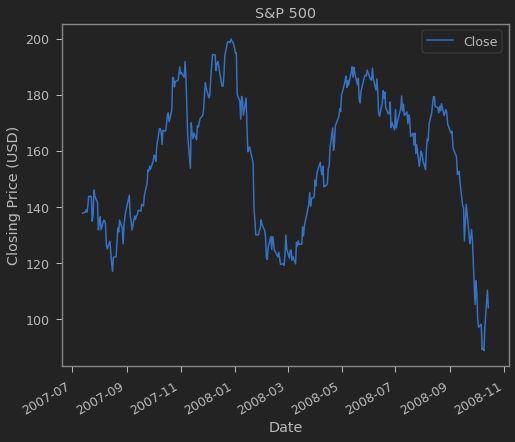

In [58]:
aapl_viz['Close'].plot(title='S&P 500', legend=True, 
                       ylabel='Closing Price (USD)')

fig_name = 'aapl_close.pdf'
# check if file already exists
if not os.path.isfile('output/' + fig_name):
    plt.savefig('output/' + fig_name)
    
plt.show()

### plot()

#### Line plot

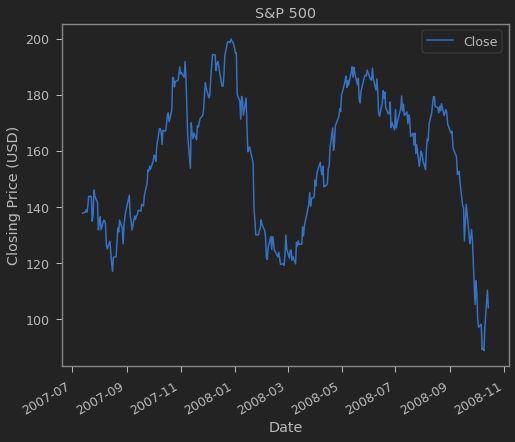

In [15]:
aapl_viz['Close'].plot(title='S&P 500', legend=True, 
                       ylabel='Closing Price (USD)')
plt.show()

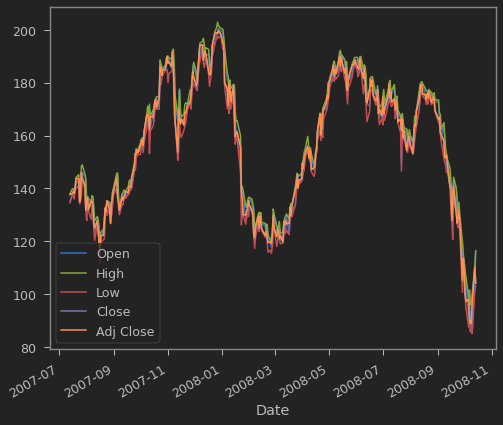

In [33]:
aapl_viz.drop('Volume', axis='columns').plot()
plt.show()

#### Scatter plot

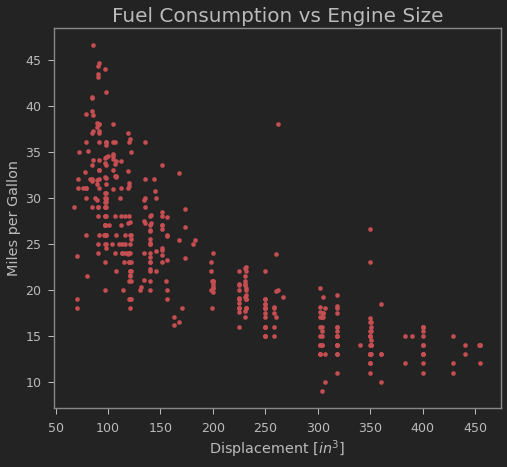

In [173]:

SELECTING
Slicing
In [111]:
￼
sales_sub = sales.head(3)auto.plot(x='displacement', y='mpg', kind='scatter', 
          xlabel='Displacement [$in^3$]', ylabel='Miles per Gallon',
          color='r')
plt.title('Fuel Consumption vs Engine Size', fontsize=20)
plt.show()

#### Scatter Matrix

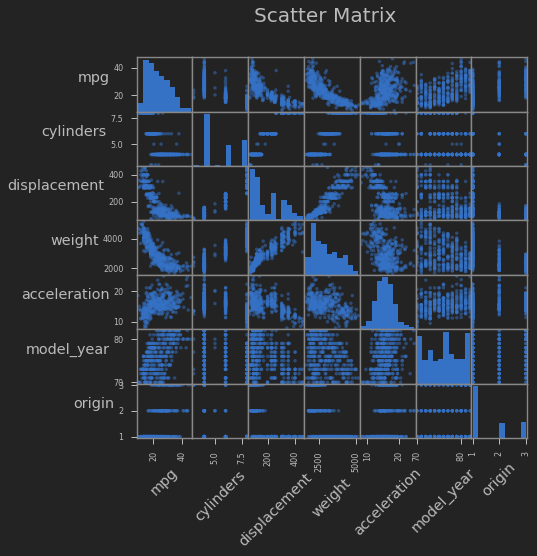

In [246]:
axes = pd.plotting.scatter_matrix(auto, figsize=(7,7))

plt.suptitle('Scatter Matrix', fontsize=20)

# rotating labels
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.show()

#### Histogram

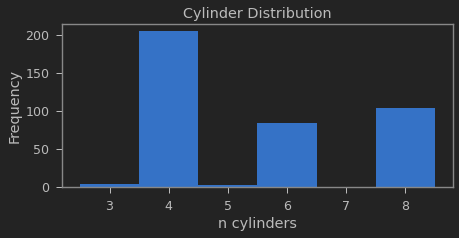

In [238]:
auto['cylinders'].plot(kind='hist', title='Cylinder Distribution',
                       ylabel='Frequency', figsize=(7,3),
                       bins=np.arange(2.5, 9.5))
plt.xlabel('n cylinders')
plt.show()

#### Boxplot

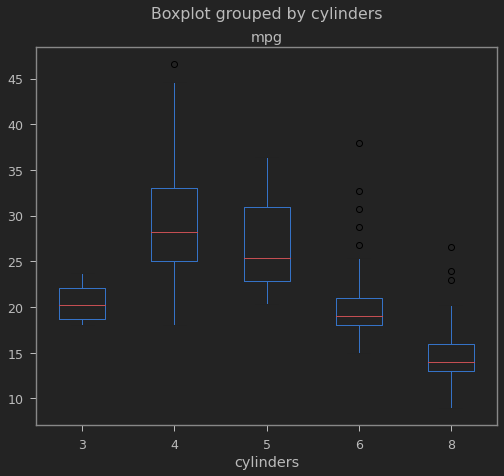

In [262]:
auto.boxplot(column='mpg', by='cylinders', grid=False)
plt.show()

#### Styles
Style format string consists of 3 characters: e.g. <code>'k.-'</code>
* 1st is color (k: black)
* 2nd is marker (. : dot)
* 3rd is line stule (- solid)

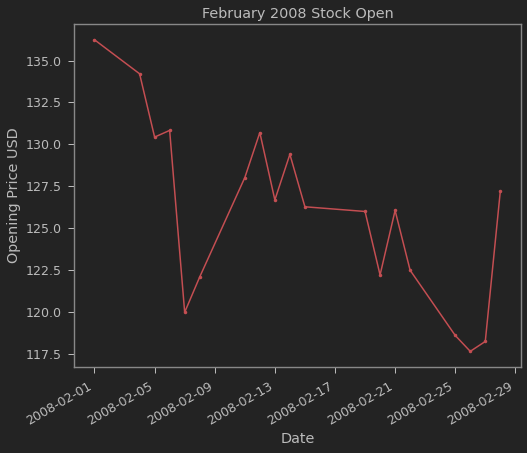

In [24]:
aapl_viz.loc['2008-02':'2008-02-28','Open'].plot(
    title='February 2008 Stock Open', 
    ylabel='Opening Price USD', style='r.-')
plt.show()

#### Subplots 

/tmp/ipykernel_116186/3257278830.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  aapl_viz.loc['2008-01':'2008-12-31', ['Volume', 'High']].plot(subplots=True,


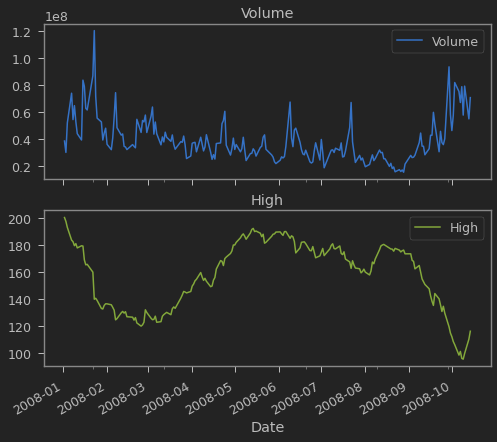

In [57]:
aapl_viz.loc['2008-01':'2008-12-31', ['Volume', 'High']].plot(subplots=True,
             title=['Volume', 'High'])
plt.show()

### Time Series

#### Specify Range

/tmp/ipykernel_116186/1648633674.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  aapl_viz.loc['2007-07':'2007-12', 'Close'].plot(title='S&P 500', legend=True,


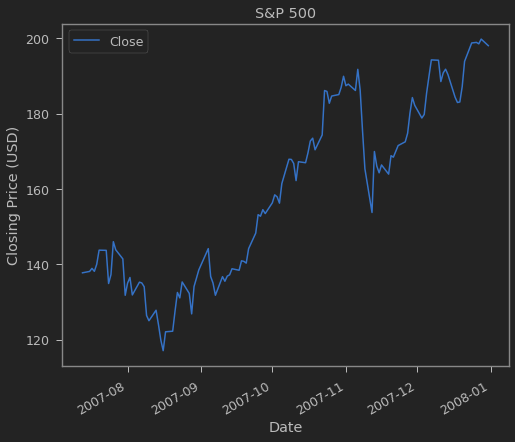

In [19]:
aapl_viz.loc['2007-07':'2007-12', 'Close'].plot(title='S&P 500', legend=True, 
                       ylabel='Closing Price (USD)')
plt.show()